---

**<font color="green">Комментарий тимлида</font>**

Привет, это Женя! Спасибо за твою работу!

Пожалуйста, не удаляй мои комментарии <3

---

# Анализ маркетинговых затрат для мобильной игры

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида
Кажется, тема не та)

</div>

# Материалы:
[Презентация](https://yadi.sk/d/ZQhbiBz4bkfYqQ)

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида
**У меня для тебя две новости - хорошая и плохая.** Начну с плохой.. Презу придется переделать. Кое-гле меня смутили формулировки. А в выводах - перегруз текстом. Ниже я оставила комменты по каждому из слайдов. Надеюсь, они будут тебе полезными ;)


1. Неплохой титул. Но почему она квадратная? ) сейчас уже не в моде 4:3 - у всех широкие экраны
2. Ок. Необязательный слайд, но готовит нас к тому, что будет дальше. Это хорошо
3. певый вывод проще сформулировать как "нет связи", здорово что выделил Яндекс и youtube жирным). Гипотезы... проще написать "есть значимые отличия" или даже "pve игроки тратят больше "
4. Почему пользователи росли первую неделю, а потом было падение?
5. ок
6. ок
7. понять бы почему отток
8. вместо теста "потом идут.." лучше приложить краткую табличку со стоимостью и вывод, что Fb дорогой, youtube дешевый
9. Нужно сократить текст - все очень слепленно и не понятно, куда смотреть
10. хорошие рекомендации. на мой взгляд не хватает разрыва между двумя пунктами. но это уже вкусовщина)

    
    
**Хорошая новость**: Это единственный красный комментарий ;)
</div>

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2
Стало намного лучше. Теперь на каждом слайде есть краткий вывод и иллюстрация к нему. 
    
Я заметила, что "неудобные" слайды ты выкинул...ну что ж) Это не является прямой ошибкой, поэтому не буду настаивать на их включении. Рекомендации хорошие, выводы тоже)  
    
Ты большой молодец и сразу сделал уверенную работу, которую можно было бы зачесть сразу, если бы не презентация))
    
Я принимаю работу. Теперь ты можешь отдыхать, а я вернусь к тебе с обратной связью в течение пары дней ;)
</div>

# Описание проекта <a id="описание"></a>

### **Основная цель: оптимизация маркетинговых затрат.**

Заказчик — создатели игры. Нужно разобраться, в какую рекламу лучше всего вкладываться, а также какая стратегия монетизации игры лучше всего подойдет для повышения доходов от рекламы. Для этого будет необходимо разобраться, какие типы клиентов играют в наше приложение, как это влияет на прохождение и вовлеченность в игру.

### План <a id="plan"></a> 
1. [Изучение данных](#st1)
1. [Предобработка данных](#st2)
1. [Анализ данных](#st3)
    - 3.1. [Количество игроков и событий](#st3_1)
    - 3.2. [Анализ стратегий игроков](#st3_2)
    - 3.3. [Метрики](#st3_3)
    
1. [Проверка гипотез](#st4)
    - 4.1. [Медианное время прохождения уровня в зависимости от стратегии прохождения различается](#st4_1)
    - 4.2. [Среднее количество построенных объектов в зависимости от стратегии прохождения различается](#st4_3)
1. [Выводы](#st5)

### Данные

Датасет с данными о действиях пользователей приложения game_actions.csv включает в себя следующие данные:
- event_datetime — время события
- event — одно из трёх событий:
    - building — объект построен
    - finished_stage_1 — первый уровень завершён
    - project — проект завершён;
- building_type — один из трёх типов здания:
    - assembly_shop — сборочный цех
    - spaceport — космопорт
    - research_center — исследовательский центр
- user_id — идентификатор пользователя
- project_type — тип реализованного проекта

Датасеты с информацией о рекламных активностях:
- ad_cost.csv, включает в себя следующие данные:
    - day - день, в который был совершен клик по объявлению
    - source - источник трафика
    - cost - стоимость кликов
- user_source.csv, включает в себя следующие данные:
    - user_id - идентификатор пользователя
    - source - идентификатор источников, с которого пришёл пользователь, установивший приложение


<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Очень приятное, удобное оформление) Есть небольшое описание - отлично!

</div>

### [Шаг 1. Изучение данных](#plan) <a id="st1"></a> 

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mth
import seaborn as sns
import datetime as dt
import plotly.express as px
from scipy import stats
from plotly import graph_objects as go
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
game_actions = pd.read_csv('game_actions.csv')
ad_costs = pd.read_csv('ad_costs.csv')
user_source = pd.read_csv('user_source.csv')

Общая информация по датафреймам

In [3]:
def df_info(df): 
    print(df.info())
    display(df.head())
    display(df.describe())
    print('Пропущенные значения в датафрейме:')
    print(df.isna().sum())
    print('\nДубликаты:', df.duplicated().sum()) 

In [4]:
df_info(game_actions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB
None


event_datetime     event  building_type  \
0  2020-05-04 00:00:01  building  assembly_shop   
1  2020-05-04 00:00:03  building  assembly_shop   
2  2020-05-04 00:00:16  building  assembly_shop   
3  2020-05-04 00:00:16  building  assembly_shop   
4  2020-05-04 00:00:35  building  assembly_shop   

                                user_id project_type  
0  55e92310-cb8e-4754-b622-597e124b03de          NaN  
1  c07b1c10-f477-44dc-81dc-ec82254b1347          NaN  
2  6edd42cc-e753-4ff6-a947-2107cd560710          NaN  
3  92c69003-d60a-444a-827f-8cc51bf6bf4c          NaN  
4  cdc6bb92-0ccb-4490-9866-ef142f09139d          NaN

event_datetime     event building_type  \
count                135640    135640        127957   
unique               128790         3             3   
top     2020-05-07 03:10:43  building     spaceport   
freq                      4    127957         59325   

                                     user_id                project_type  
count                                 135640                        1866  
unique                                 13576                           1  
top     ff841992-d93b-462e-bc6e-18c24a514f36  satellite_orbital_assembly  
freq                                      22                        1866

Пропущенные значения в датафрейме:
event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

Дубликаты: 1


- 135640 событий и 13576 уникальных пользователей
- В building_type пропущего 7683 значений. Данное кол-во незначительно по отношению к общему кол-ву
- 1 дубликат
- В project_type только одно значение "satellite_orbital_assembly", и оно встречается только 1866 раз
- Нужно изменить формат event_datetime на более подходящий datetime и удалить дубль

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида

Насчет пропусков в building_type... есть там определенная логика)) Например в том, что это тип **постройки**, а события у нас есть не только по постройкам

</div>

In [5]:
df_info(ad_costs)
print('\nИсточники:', ad_costs['source'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
None


source         day        cost
0  facebook_ads  2020-05-03  935.882786
1  facebook_ads  2020-05-04  548.354480
2  facebook_ads  2020-05-05  260.185754
3  facebook_ads  2020-05-06  177.982200
4  facebook_ads  2020-05-07  111.766796

cost
count   28.000000
mean   271.556321
std    286.867650
min     23.314669
25%     66.747365
50%    160.056443
75%    349.034473
max    969.139394

Пропущенные значения в датафрейме:
source    0
day       0
cost      0
dtype: int64

Дубликаты: 0

Источники: ['facebook_ads' 'instagram_new_adverts' 'yandex_direct'
 'youtube_channel_reklama']


- В целом только 28 записей
- 4 рекламных источника 'facebook_ads', 'instagram_new_adverts', 'yandex_direct', 'youtube_channel_reklama'
- Пропущенных значений и дубликатов нет
- Нужно изменить формат day на более подходящий datetime и переименовать поле day в date

In [6]:
df_info(user_source)
print('\nИсточники:', user_source['source'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB
None


user_id                   source
0  0001f83c-c6ac-4621-b7f0-8a28b283ac30             facebook_ads
1  00151b4f-ba38-44a8-a650-d7cf130a0105            yandex_direct
2  001aaea6-3d14-43f1-8ca8-7f48820f17aa  youtube_channel_reklama
3  001d39dc-366c-4021-9604-6a3b9ff01e25    instagram_new_adverts
4  002f508f-67b6-479f-814b-b05f00d4e995             facebook_ads

user_id         source
count                                  13576          13576
unique                                 13576              4
top     1635687f-34f1-47db-81f3-6b8cd1b13c8d  yandex_direct
freq                                       1           4817

Пропущенные значения в датафрейме:
user_id    0
source     0
dtype: int64

Дубликаты: 0

Источники: ['facebook_ads' 'yandex_direct' 'youtube_channel_reklama'
 'instagram_new_adverts']


- Пропущенных значений и дубликатов нет.
- Источники в user_source и в ad_costs совпадают

### [2. Предобработка данных](#plan) <a id="st2"></a> 

In [7]:
# Удаляем дубликат
print(game_actions.shape)
game_actions = game_actions.drop_duplicates()
print(game_actions.shape)

(135640, 5)
(135639, 5)


Данная функция меняет формат данных в колонке на нужный

In [8]:
def to_datetime(df, time, format):
    df[time] = pd.to_datetime(df[time], format=format)

In [9]:
to_datetime(game_actions, 'event_datetime', '%Y-%m-%d %H:%M:%S')
to_datetime(ad_costs, 'day', '%Y-%m-%d')

In [10]:
# Переименовал колонку
ad_costs.rename(columns = {'day':'date'}, inplace = True)

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Данные готовы - можно анализировать
</div>

### [3. Анализ данных](#plan) <a id="st3"></a> 

In [11]:
# Добавим дополнительные столбцы
game_actions['month'] = game_actions['event_datetime'].dt.month
game_actions['week'] = game_actions['event_datetime'].dt.week
game_actions['date'] = game_actions['event_datetime'].dt.date
game_actions['hour'] = game_actions['event_datetime'].dt.hour
game_actions['weekday'] = game_actions['event_datetime'].dt.day_name()

In [12]:
# Добавил информацию об источнике игрока
game_actions = game_actions.merge(user_source, how='left', on='user_id')

### [3.1. Количество игроков и событий](#plan) <a id="st3_1"></a> 

Функция считает кол-во уникальных игроков и событий за определенное время и выводит графики

In [13]:
def num_users_period(df, period):  
    users = (df.groupby(period).agg(user_count = ('user_id','nunique'),event_count = ('user_id','count')))
    users['events_per_user'] = users['event_count']/users['user_count']
    users = users.sort_values(by=period)
    users[['user_count', 'event_count']].plot(figsize=(16,6), kind='bar', grid=True)
    plt.xlabel('')
    plt.xticks(rotation=45) 
    plt.ylabel('кол-во игроков и событий')
    plt.legend(['Игроки','События'])
    plt.show()

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

👍
</div>

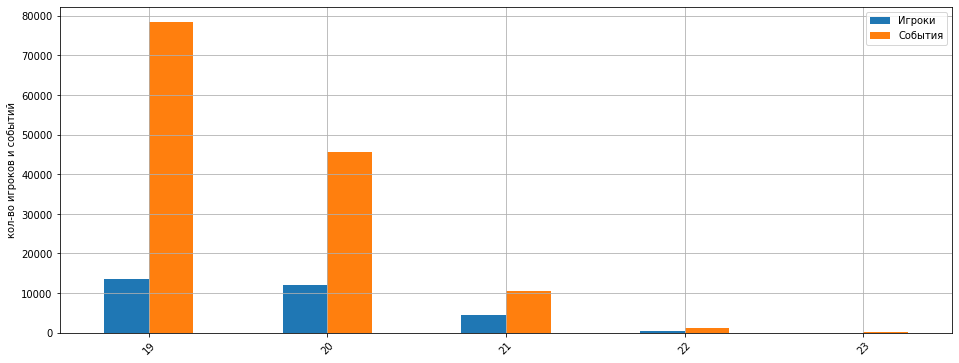

In [14]:
# Неделя
num_users_period(game_actions, ['week'])

- Происходит снижение посещений

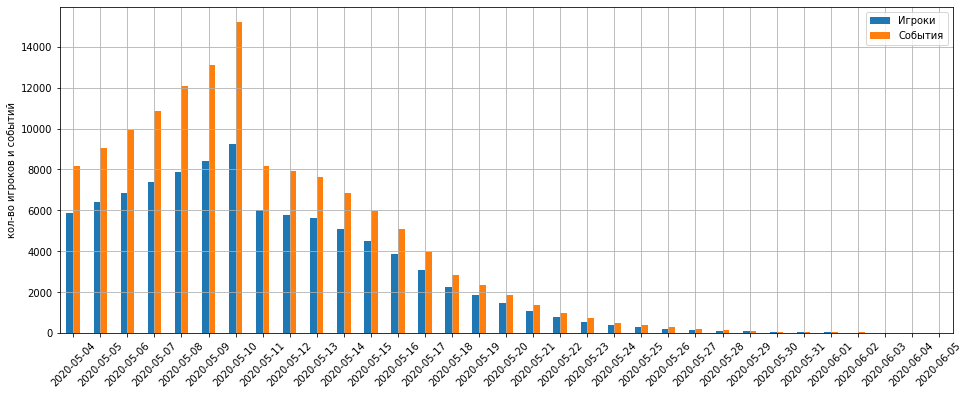

In [15]:
# День
num_users_period(game_actions, ['date'])

- С понедельника (2020-05-04) до воскресенья (2020-05-10) происходит повышение кол-ва игроков и событий. Затем идет значительный спад с последйющей регрессией

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида

Интересно, с чем это может быть связано? ;)
</div>

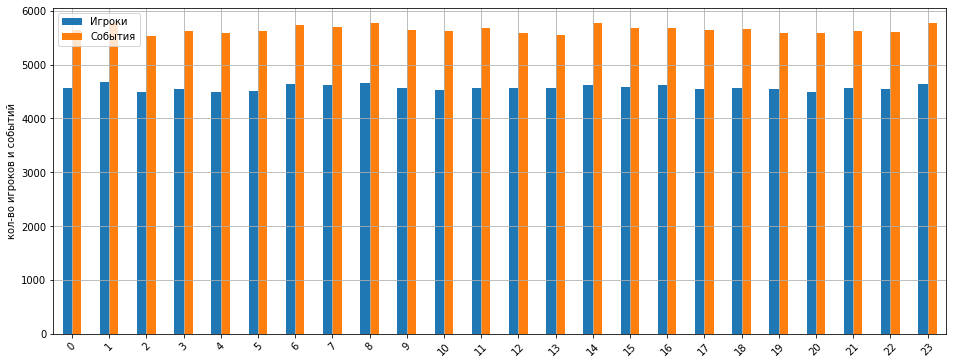

In [16]:
# Час
num_users_period(game_actions, ['hour'])

- Заметных различий по кол-ву игроков и событий в зависимости от времени суток нет

Посчитал кол-во уникальных игроков в месяц, неделю и день

In [17]:
mau_all = game_actions.groupby(['month']).agg({'user_id':['nunique']}).mean()
print('MAU:', int(mau_all))

wau_all = game_actions.groupby(['week']).agg({'user_id':['nunique']}).mean()
print('WAU:', int(wau_all))

dau_all = game_actions.groupby(['date']).agg({'user_id':['nunique']}).mean()
print('DAU:', int(dau_all))

MAU: 6802
WAU: 6120
DAU: 2884


In [18]:
mau = game_actions.pivot_table(index = ['month'], columns = 'source', values = 'user_id', aggfunc = 'nunique').mean()
print('MAU:', mau)
print('\n')
wau = game_actions.pivot_table(index = ['week'], columns = 'source', values = 'user_id', aggfunc = 'nunique').mean()
print('WAU:', wau)
print('\n')
dau = game_actions.pivot_table(index = ['date', 'week'], columns = 'source', values = 'user_id', aggfunc = 'nunique').mean()
print('DAU:', dau)

MAU: source
facebook_ads               1366.0
instagram_new_adverts      1676.0
yandex_direct              2414.5
youtube_channel_reklama    1346.0
dtype: float64


WAU: source
facebook_ads               1233.6
instagram_new_adverts      1520.0
yandex_direct              2161.2
youtube_channel_reklama    1205.2
dtype: float64


DAU: source
facebook_ads                585.666667
instagram_new_adverts       716.575758
yandex_direct              1018.727273
youtube_channel_reklama     581.531250
dtype: float64


<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида

Здесь хорошо бы сводная смотрелась. 
</div>

Посчитал sticky factor

In [19]:
sticky_factor = dau_all/mau_all*100
int(sticky_factor)

42

In [20]:
sticky_factor_src = dau/mau*100
sticky_factor_src

source
facebook_ads               42.874573
instagram_new_adverts      42.755117
yandex_direct              42.192059
youtube_channel_reklama    43.204402
dtype: float64

- Примерно 42-43% игроков остаются играть вне зависимости от их источника

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Ок. Это хорошо или плохо?
</div>

Как распределено кол-во игроков и событий в зависимости от того, откуда они пришли к нам

In [21]:
dist_users = game_actions.groupby('source').agg(event_amount = ('user_id', 'count'), user_amount = ('user_id', 'nunique'))
dist_users['users_events'] = dist_users['event_amount']/dist_users['user_amount']
dist_users = dist_users.sort_values('user_amount', ascending=False)

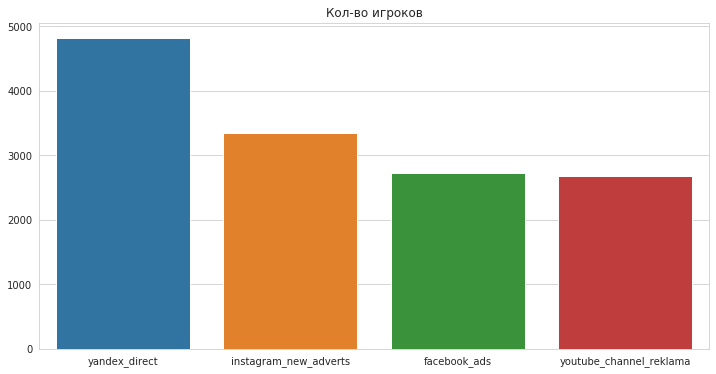

event_amount  user_amount  users_events
source                                                          
yandex_direct                   47694         4817      9.901183
instagram_new_adverts           33757         3347     10.085748
facebook_ads                    27672         2726     10.151137
youtube_channel_reklama         26516         2686      9.871929

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Кол-во игроков')
sns.barplot(x=dist_users.index, y=dist_users['user_amount'])
plt.xlabel('')
plt.ylabel('')
plt.show()
display(dist_users)

- Яндекс.Директ дал больше всего игроков (4817), потом Instagram (3347), Facebook (2726) и Youtube (2686)
- Разницы между игроками по кол-ву событий по различным источникам нет

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Отлично! Хорошо бы еще стоимость проверить. Надеюсь, она есть дальше ;)
</div>

### [3.2. Анализ стратегий игроков](#plan) <a id="st3_2"></a> 

У игрока, который прошел уровень, есть событие 'finished_stage_1'. Если он построил проект, то он также имеет событие 'project', если такового нет, то данный игрок победил врага

In [23]:
# Все игроки прошедшие уровень
num_success = game_actions[game_actions['event'] == 'finished_stage_1']['user_id'].count()
# Строители
num_builders = game_actions[game_actions['project_type'] == 'satellite_orbital_assembly']['user_id'].count()
# Воины
num_fighters = num_success - num_builders
print('Кол-во строителей:', num_builders)
print('Кол-во воинов:', num_fighters)

Кол-во строителей: 1866
Кол-во воинов: 3951


- Строителей в 2 раза меньше чем воинов.

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Хм.. заметен явный фаворит среди стратегий
</div>

Добавил в game_actions колонку с текущим статусом:

In [24]:
# Создал справочник событий по каждому игроку
events = game_actions.groupby('user_id')['event'].unique()
events.head()

user_id
0001f83c-c6ac-4621-b7f0-8a28b283ac30                      [building]
00151b4f-ba38-44a8-a650-d7cf130a0105                      [building]
001aaea6-3d14-43f1-8ca8-7f48820f17aa                      [building]
001d39dc-366c-4021-9604-6a3b9ff01e25    [building, finished_stage_1]
002f508f-67b6-479f-814b-b05f00d4e995                      [building]
Name: event, dtype: object

Данная функция определяет какую стратегию использует игрок

In [25]:
def current_status(event):
    if event['event'] == 'project':
        return 'project'
    if event['event'] == "finished_stage_1":
        if 'project' in events[event['user_id']]:
            return 'project'
        else:
            return 'warrior'
    else:
        return 'process'

In [26]:
game_actions['status'] = game_actions.apply(lambda x: current_status(x), axis=1)
game_actions.head()

event_datetime     event  building_type  \
0 2020-05-04 00:00:01  building  assembly_shop   
1 2020-05-04 00:00:03  building  assembly_shop   
2 2020-05-04 00:00:16  building  assembly_shop   
3 2020-05-04 00:00:16  building  assembly_shop   
4 2020-05-04 00:00:35  building  assembly_shop   

                                user_id project_type  month  week        date  \
0  55e92310-cb8e-4754-b622-597e124b03de          NaN      5    19  2020-05-04   
1  c07b1c10-f477-44dc-81dc-ec82254b1347          NaN      5    19  2020-05-04   
2  6edd42cc-e753-4ff6-a947-2107cd560710          NaN      5    19  2020-05-04   
3  92c69003-d60a-444a-827f-8cc51bf6bf4c          NaN      5    19  2020-05-04   
4  cdc6bb92-0ccb-4490-9866-ef142f09139d          NaN      5    19  2020-05-04   

   hour weekday                   source   status  
0     0  Monday  youtube_channel_reklama  process  
1     0  Monday             facebook_ads  process  
2     0  Monday    instagram_new_adverts  process  
3     0  Monday             facebook_ads  process  
4     0  Monday            yandex_direct  process

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида

Данная функция не выдает текущий статус. Она только определяет, является ли **событие** прохождением уровня определенным способом.
    
Ниже пример того, как у пользователя сначала идет "process" > "project" > "process" > "project"
Если игрок построит что-то после прохождения, последний статус у него будет "process"
    
С этим можно работать, но описание функции точно некорректное
 
</div>

In [27]:
## КОД ТИМЛИДА ##
game_actions.query('user_id == "e3c66498-9d45-4000-9392-f81e6796e7da"').sort_values(by = 'event_datetime')

event_datetime             event    building_type  \
2196  2020-05-04 06:50:30          building    assembly_shop   
3936  2020-05-04 11:58:16          building        spaceport   
20206 2020-05-06 07:22:08          building    assembly_shop   
20261 2020-05-06 07:31:59          building    assembly_shop   
27376 2020-05-07 00:34:18          building        spaceport   
31983 2020-05-07 10:52:16          building    assembly_shop   
32956 2020-05-07 12:58:20          building    assembly_shop   
33910 2020-05-07 14:58:20          building    assembly_shop   
35308 2020-05-07 18:12:58          building  research_center   
40433 2020-05-08 05:00:46          building        spaceport   
46241 2020-05-08 16:28:19          building  research_center   
47121 2020-05-08 18:10:25           project              NaN   
61383 2020-05-09 20:51:21          building  research_center   
69604 2020-05-10 10:30:22  finished_stage_1              NaN   

                                    user_id                project_type  \
2196   e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
3936   e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
20206  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
20261  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
27376  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
31983  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
32956  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
33910  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
35308  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
40433  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
46241  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
47121  e3c66498-9d45-4000-9392-f81e6796e7da  satellite_orbital_assembly   
61383  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   
69604  e3c66498-9d45-4000-9392-f81e6796e7da                         NaN   

       month  week        date  hour    weekday                   source  \
2196       5    19  2020-05-04     6     Monday  youtube_channel_reklama   
3936       5    19  2020-05-04    11     Monday  youtube_channel_reklama   
20206      5    19  2020-05-06     7  Wednesday  youtube_channel_reklama   
20261      5    19  2020-05-06     7  Wednesday  youtube_channel_reklama   
27376      5    19  2020-05-07     0   Thursday  youtube_channel_reklama   
31983      5    19  2020-05-07    10   Thursday  youtube_channel_reklama   
32956      5    19  2020-05-07    12   Thursday  youtube_channel_reklama   
33910      5    19  2020-05-07    14   Thursday  youtube_channel_reklama   
35308      5    19  2020-05-07    18   Thursday  youtube_channel_reklama   
40433      5    19  2020-05-08     5     Friday  youtube_channel_reklama   
46241      5    19  2020-05-08    16     Friday  youtube_channel_reklama   
47121      5    19  2020-05-08    18     Friday  youtube_channel_reklama   
61383      5    19  2020-05-09    20   Saturday  youtube_channel_reklama   
69604      5    19  2020-05-10    10     Sunday  youtube_channel_reklama   

        status  
2196   process  
3936   process  
20206  process  
20261  process  
27376  process  
31983  process  
32956  process  
33910  process  
35308  process  
40433  process  
46241  process  
47121  project  
61383  process  
69604  project

Создал таблицу со всеми данными по игрокам:

In [28]:
# Создал таблицу
users_info = game_actions.groupby(['user_id', 'event'])['user_id'].count().unstack(level=1).reset_index()
# Удалил ненужные колонки
users_info = users_info.drop(columns = ['finished_stage_1', 'project'])
users_info.head()

event                               user_id  building
0      0001f83c-c6ac-4621-b7f0-8a28b283ac30      13.0
1      00151b4f-ba38-44a8-a650-d7cf130a0105       9.0
2      001aaea6-3d14-43f1-8ca8-7f48820f17aa       4.0
3      001d39dc-366c-4021-9604-6a3b9ff01e25       8.0
4      002f508f-67b6-479f-814b-b05f00d4e995      12.0

In [29]:
# Дополнил информацией о кол-ве объектов
buildins_info = game_actions.groupby(['user_id', 'building_type'])['user_id'].count().unstack(level=1).reset_index()
users_info = users_info.merge(buildins_info, how='left', on='user_id')

In [30]:
# Из какого источника пришел игрок
users_info = users_info.merge(user_source, how='left', on='user_id')

In [31]:
# Первое событие
act = game_actions.groupby(['user_id']).agg(first_event = ('event_datetime', 'min')).reset_index()
users_info = users_info.merge(act, how='left', on='user_id')

In [32]:
# Последний статус
status = game_actions.groupby(['user_id'])['event_datetime'].max().reset_index()
status = status.merge(game_actions, how='left', left_on=['user_id', 'event_datetime'], right_on=['user_id', 'event_datetime'])
# Удалил колонки
status = status.drop(columns = ['event', 'building_type', 'project_type', 'date', 'week', 'hour', 'source'])
status.rename(columns = {'event_datetime':'last_event'}, inplace = True)
status.head()

user_id          last_event  month    weekday  \
0  0001f83c-c6ac-4621-b7f0-8a28b283ac30 2020-05-20 11:26:06      5  Wednesday   
1  00151b4f-ba38-44a8-a650-d7cf130a0105 2020-05-18 10:46:52      5     Monday   
2  001aaea6-3d14-43f1-8ca8-7f48820f17aa 2020-05-14 09:21:27      5   Thursday   
3  001d39dc-366c-4021-9604-6a3b9ff01e25 2020-05-12 07:40:47      5    Tuesday   
4  002f508f-67b6-479f-814b-b05f00d4e995 2020-05-22 02:46:45      5     Friday   

    status  
0  process  
1  process  
2  process  
3  warrior  
4  process

In [33]:
users_info = users_info.merge(status, how='left', on='user_id')
users_info.head()

user_id  building  assembly_shop  \
0  0001f83c-c6ac-4621-b7f0-8a28b283ac30      13.0            6.0   
1  00151b4f-ba38-44a8-a650-d7cf130a0105       9.0            4.0   
2  001aaea6-3d14-43f1-8ca8-7f48820f17aa       4.0            2.0   
3  001d39dc-366c-4021-9604-6a3b9ff01e25       8.0            4.0   
4  002f508f-67b6-479f-814b-b05f00d4e995      12.0            3.0   

   research_center  spaceport                   source         first_event  \
0              1.0        6.0             facebook_ads 2020-05-06 01:07:37   
1              NaN        5.0            yandex_direct 2020-05-06 03:09:12   
2              NaN        2.0  youtube_channel_reklama 2020-05-05 18:08:52   
3              NaN        4.0    instagram_new_adverts 2020-05-05 21:02:05   
4              1.0        8.0             facebook_ads 2020-05-05 13:49:58   

           last_event  month    weekday   status  
0 2020-05-20 11:26:06      5  Wednesday  process  
1 2020-05-18 10:46:52      5     Monday  process  
2 2020-05-14 09:21:27      5   Thursday  process  
3 2020-05-12 07:40:47      5    Tuesday  warrior  
4 2020-05-22 02:46:45      5     Friday  process

Стратегии игроков в зависимости от их источника

In [34]:
strategy_source = users_info.groupby(['source', 'status']).agg(amount=('user_id', 'nunique')).reset_index()
group_strategy_source = strategy_source.groupby('source').agg(all=('amount', 'sum')).reset_index()
strategy_source['total'] = strategy_source.apply(lambda x: group_strategy_source[group_strategy_source['source'] == x.source]['all'].values[0], axis=1)

# Создал колонку с процентами стратегий
strategy_source['percent'] = round((strategy_source['amount']/strategy_source['total']) * 100 , 2)
strategy_source['percent'] = strategy_source.apply(lambda x: str(x['percent']) + '%', axis = 1)
strategy_source = strategy_source.sort_values(by=['total', 'amount'], ascending=[False, False])

strategy_source.head()

source   status  amount  total percent
6          yandex_direct  process    2775   4817  57.61%
8          yandex_direct  warrior    1422   4817  29.52%
7          yandex_direct  project     620   4817  12.87%
3  instagram_new_adverts  process    1881   3347   56.2%
5  instagram_new_adverts  warrior     990   3347  29.58%

In [35]:
fig = px.bar(strategy_source, x='source', y='amount', color='status', text = 'percent')
fig.update_layout(
    title="Распределение игроков по способу прохождения",
    xaxis_title="",
    yaxis_title="Кол-во")
fig.show()

- Различий процентного распределения стратегий игроков из-за разных источников нет
- 14% строители
- 30% воины
- 56% не закончили

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Симпатичный график!
 
</div>

Время прохождения уровня

In [36]:
# Добавим в отчёт по пользователям поле с разницей между первым и последним событием в игре:
users_info['duration_hour'] = (users_info['last_event'] - users_info['first_event']).astype('timedelta64[h]')
users_info['duration_day'] = (users_info['last_event'] - users_info['first_event']).astype('timedelta64[D]')
users_info.head()

user_id  building  assembly_shop  \
0  0001f83c-c6ac-4621-b7f0-8a28b283ac30      13.0            6.0   
1  00151b4f-ba38-44a8-a650-d7cf130a0105       9.0            4.0   
2  001aaea6-3d14-43f1-8ca8-7f48820f17aa       4.0            2.0   
3  001d39dc-366c-4021-9604-6a3b9ff01e25       8.0            4.0   
4  002f508f-67b6-479f-814b-b05f00d4e995      12.0            3.0   

   research_center  spaceport                   source         first_event  \
0              1.0        6.0             facebook_ads 2020-05-06 01:07:37   
1              NaN        5.0            yandex_direct 2020-05-06 03:09:12   
2              NaN        2.0  youtube_channel_reklama 2020-05-05 18:08:52   
3              NaN        4.0    instagram_new_adverts 2020-05-05 21:02:05   
4              1.0        8.0             facebook_ads 2020-05-05 13:49:58   

           last_event  month    weekday   status  duration_hour  duration_day  
0 2020-05-20 11:26:06      5  Wednesday  process          346.0          14.0  
1 2020-05-18 10:46:52      5     Monday  process          295.0          12.0  
2 2020-05-14 09:21:27      5   Thursday  process          207.0           8.0  
3 2020-05-12 07:40:47      5    Tuesday  warrior          154.0           6.0  
4 2020-05-22 02:46:45      5     Friday  process          396.0          16.0

Функция строит распределение параметра и показывает средние значения по параметру

In [37]:
def distribution(df, parametr, argument, title):
    plt.figure(figsize=(18,6))
    plt.title(title)
    for unit in df[argument].unique():
        sns.distplot(df[df[argument] == unit][parametr], label = unit, hist_kws={'alpha':0.25})
    plt.legend()
    plt.xlabel('')
    plt.show()
    display(df.groupby(argument).agg(mean = (parametr, 'mean')).sort_values('mean', ascending=False))

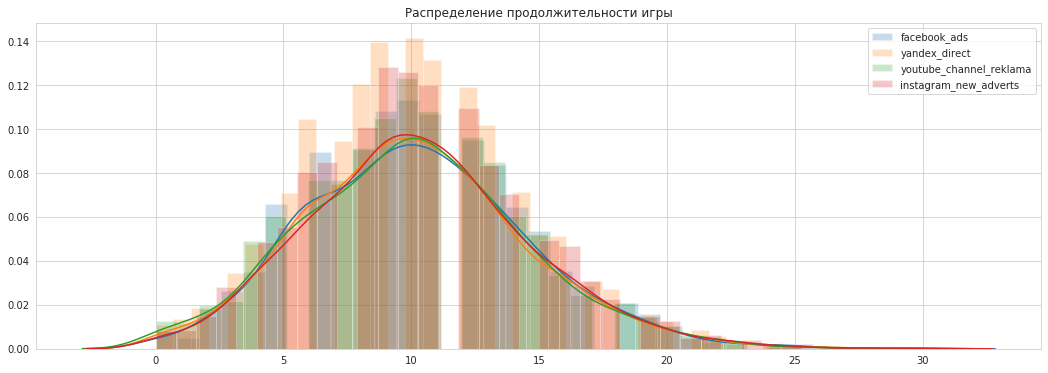

mean
source                            
instagram_new_adverts    10.289812
facebook_ads             10.223404
yandex_direct            10.121652
youtube_channel_reklama  10.080045

In [38]:
distribution(users_info, 'duration_day', 'source', 'Распределение продолжительности игры')

- В среднем играют 10 дней вне зависимости от источника игрока
- Распределения нормальные

Количество построенных объектов

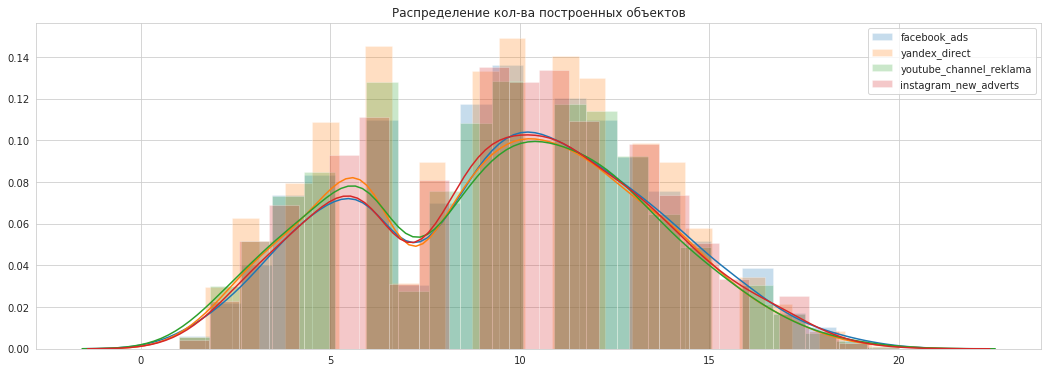

mean
source                           
facebook_ads             9.585840
instagram_new_adverts    9.505527
yandex_direct            9.348557
youtube_channel_reklama  9.299330

In [39]:
distribution(users_info, 'building', 'source', 'Распределение кол-ва построенных объектов')

- Кол-во построенных объектов по каждому источнику одинаковое
- В распределениях есть две вершинны из-за крупного оттока после первой недели

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида
Похоже, разницы между источниками нет
 
</div>

Время окончания уровня по каждой стратегии

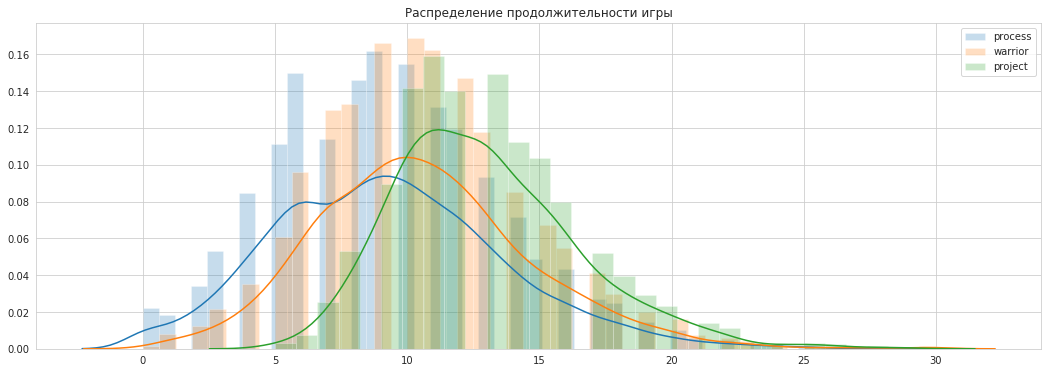

mean
status            
project  12.963023
warrior  10.606176
process   9.285475

In [40]:
distribution(users_info, 'duration_day', 'status', 'Распределение продолжительности игры')

- Строители проходят уровень в среднем за 13 дней, а воины за 10,5
- Распределения нормальные

Распределение количества построенных объектов по стратегиям

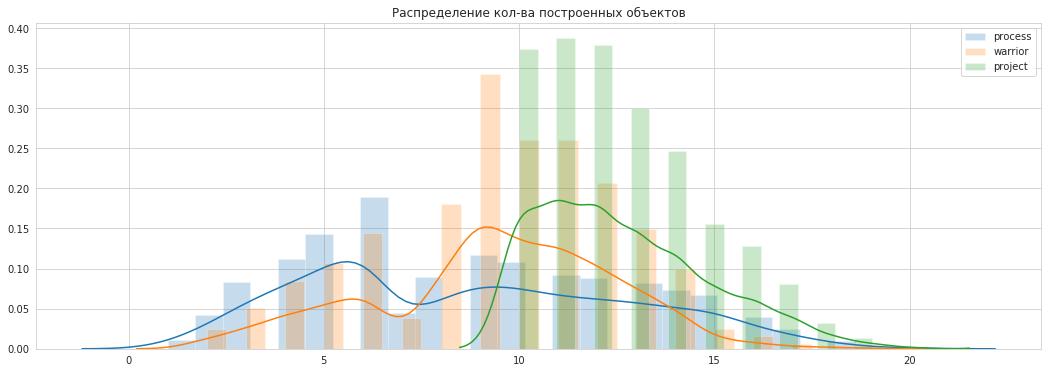

mean
status            
project  12.647910
warrior   9.411541
process   8.657043

In [41]:
distribution(users_info, 'building', 'status', 'Распределение кол-ва построенных объектов')

- Строители строят в среднем 12,6 объекта, а воины 9,4
- Распределение строителей имеет одну вершину, но у воинов две вершины

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида
А вот в стратегиях различия колоссальные!
 
</div>

### [3.3. Метрики](#plan) <a id="st3_3"></a> 

Retention rate

Сформировал игроков по когортам относительно их первого дня

In [42]:
# Добавил дату первого дня
first_activity = users_info[['user_id', 'first_event']].rename(columns = {'first_event':'first_date'})
first_activity['first_date'] = first_activity['first_date'].dt.date
game_actions = game_actions.merge(first_activity, how='left', on='user_id')     

# Добавил lifetime:
game_actions['lifetime'] = game_actions['date'] - game_actions['first_date']
game_actions['lifetime'] = game_actions['lifetime'] / np.timedelta64(1,'D')
game_actions['lifetime'] = round(game_actions['lifetime']).astype('int')

In [43]:
game_actions.head()

event_datetime     event  building_type  \
0 2020-05-04 00:00:01  building  assembly_shop   
1 2020-05-04 00:00:03  building  assembly_shop   
2 2020-05-04 00:00:16  building  assembly_shop   
3 2020-05-04 00:00:16  building  assembly_shop   
4 2020-05-04 00:00:35  building  assembly_shop   

                                user_id project_type  month  week        date  \
0  55e92310-cb8e-4754-b622-597e124b03de          NaN      5    19  2020-05-04   
1  c07b1c10-f477-44dc-81dc-ec82254b1347          NaN      5    19  2020-05-04   
2  6edd42cc-e753-4ff6-a947-2107cd560710          NaN      5    19  2020-05-04   
3  92c69003-d60a-444a-827f-8cc51bf6bf4c          NaN      5    19  2020-05-04   
4  cdc6bb92-0ccb-4490-9866-ef142f09139d          NaN      5    19  2020-05-04   

   hour weekday                   source   status  first_date  lifetime  
0     0  Monday  youtube_channel_reklama  process  2020-05-04         0  
1     0  Monday             facebook_ads  process  2020-05-04         0  
2     0  Monday    instagram_new_adverts  process  2020-05-04         0  
3     0  Monday             facebook_ads  process  2020-05-04         0  
4     0  Monday            yandex_direct  process  2020-05-04         0

Функция создает таблицу для когортного анализа

In [44]:
def cohorts_src(source):
    cohorts = (game_actions[game_actions['source'].isin(source)]
               .groupby(['first_date', 'date', 'lifetime'])
               .agg(amount = ('user_id', 'nunique'),
                buildings = ('building_type', 'count')).reset_index()) 
    return cohorts

Функция считает Retention Rate и строит тепловую карту

In [45]:
def rr_cohorts(cohorts):
    # Посчитал число пользователей
    users_amount = cohorts[cohorts['lifetime'] == 0][['first_date','amount']]
    users_amount = users_amount.rename(columns={'amount':'cohorts_users'})
    cohorts = cohorts.merge(users_amount, on='first_date')

    # Рассчитал Retention Rate:
    cohorts['retention_rate'] = cohorts['amount'] / cohorts['cohorts_users']
    rr_pivot = cohorts.pivot_table(index='first_date', columns='lifetime', values='retention_rate', aggfunc='sum')
    sns.set(style='white')
    plt.figure(figsize=(16, 8))
    plt.title('Retension Rate')
    sns.heatmap(rr_pivot.loc[:,1:], annot=True, fmt='.0%', linewidths=1, linecolor='black', cmap="Blues", cbar=0)
    plt.yticks(rotation=0) 
    plt.xlabel('Кол-во дней когорты')
    plt.ylabel('Когорты')
    plt.show()

RR по всем источникам в целом

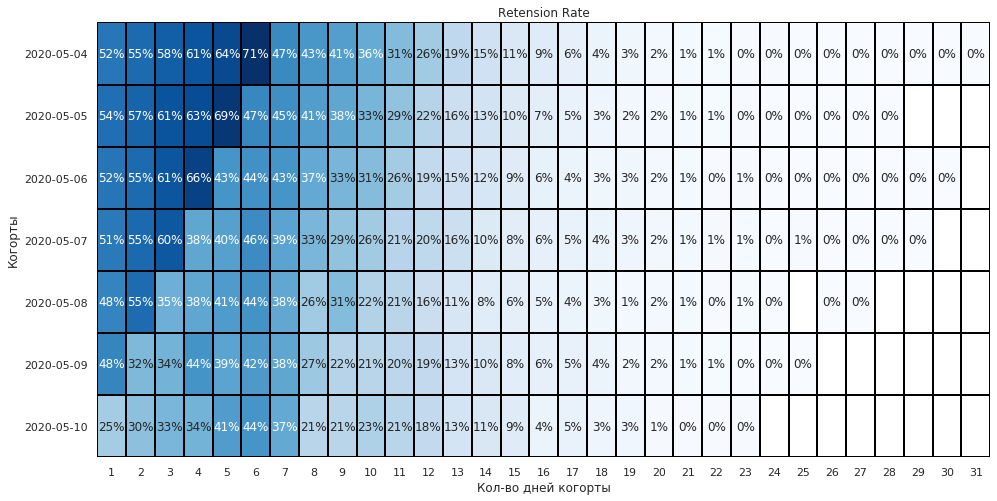

In [46]:
cohorts_all = cohorts_src(['youtube_channel_reklama', 'facebook_ads', 'instagram_new_adverts','yandex_direct'])
rr_cohorts(cohorts_all)

- Показатели первых когорт намного лучше чем у следующих
- сильный спад в показателе приходится на первый понедельник после запуска игры

RR по источникам

youtube_channel_reklama


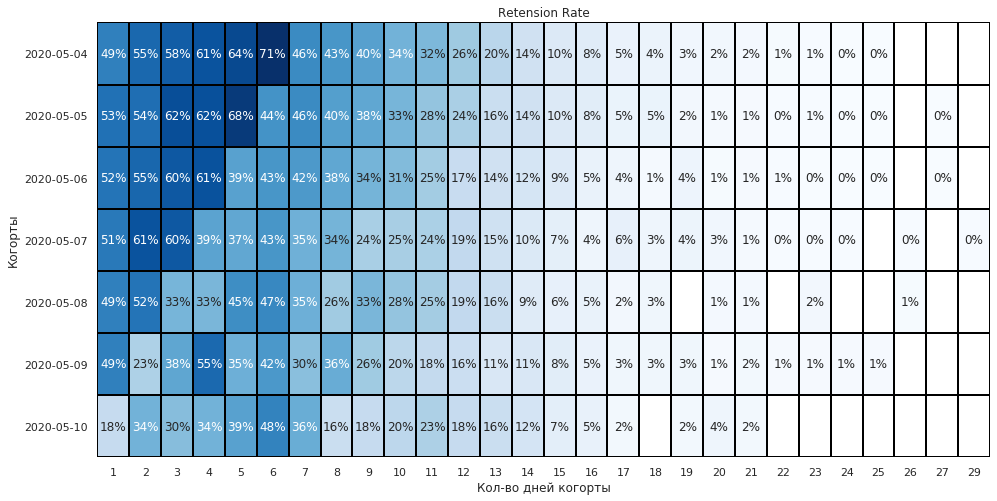

facebook_ads


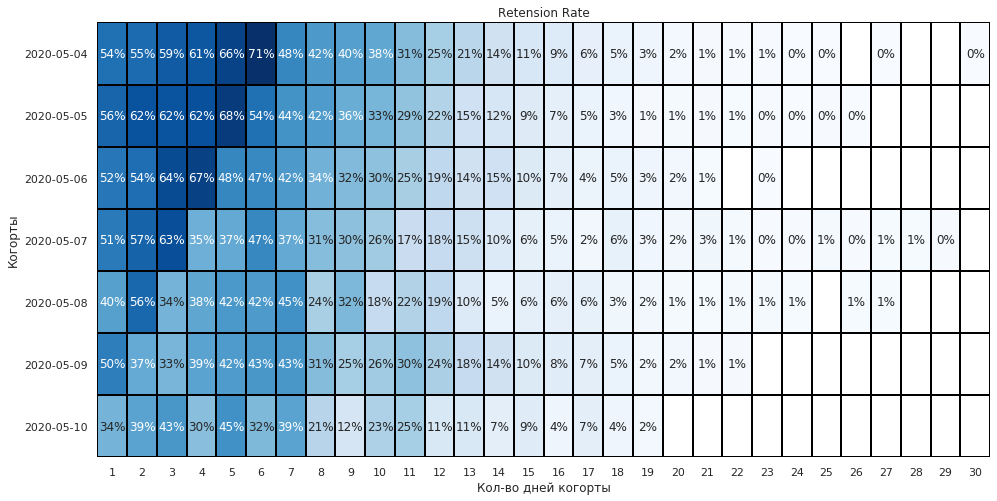

instagram_new_adverts


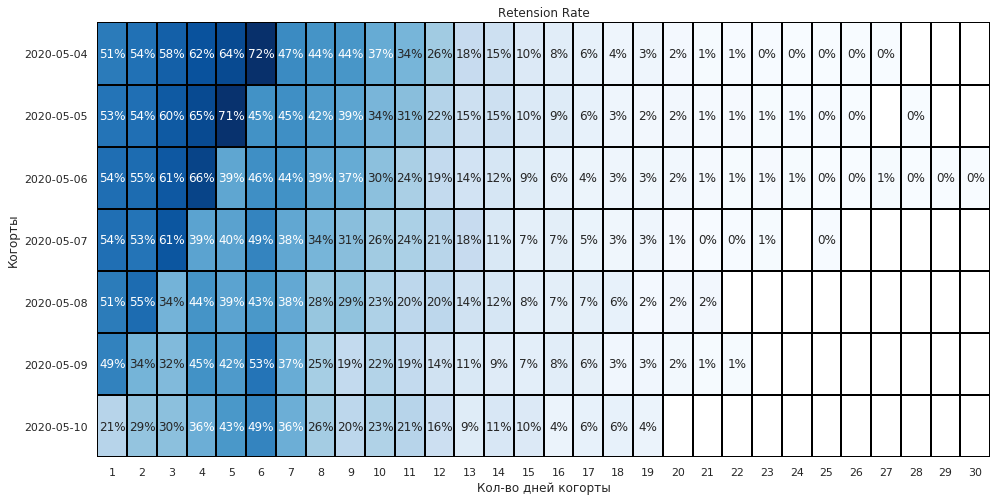

yandex_direct


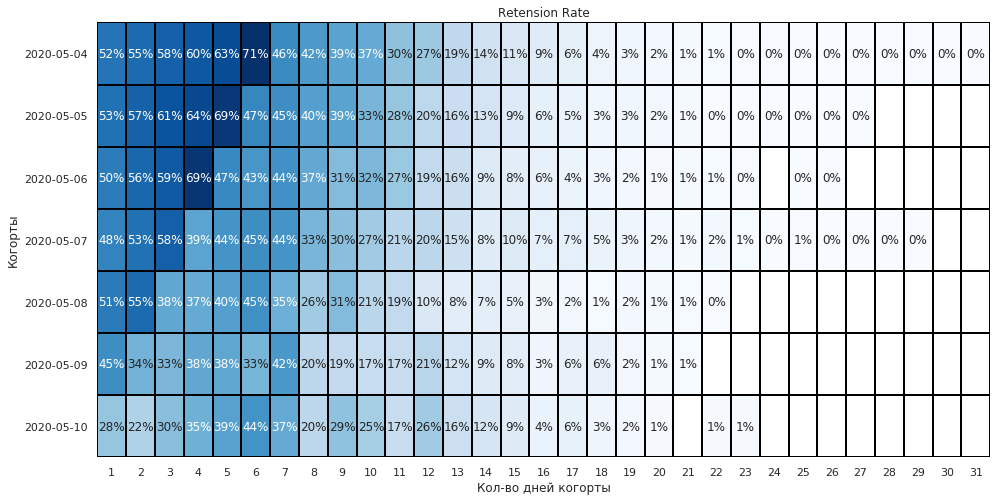

In [47]:
for src in game_actions['source'].unique():
    cohorts_source = cohorts_src([src])
    print(src)
    rr_cohorts(cohorts_source)

- Показатели в отдельности по каждому источнику похожи на общие

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Очень здорово, что ты построил Retention по источникам! Теперь нам удалось ставнить их эффективность и понять...что различий практически нет!
Чтож, это тоже результат)
 
</div>

LTV

Так как в приложении игрок видит рекламу, когда он выбирает что строить, то условимся на том, что 1 построенный объект равен 1 у.е. дохода. В этом случае можно рассчитать LTV.

Функция считает кол-во построенных объектов

In [48]:
def bldgs(cohorts):
    cohorts['ltv'] = cohorts['buildings'] / cohorts['amount']
    all = cohorts.pivot_table(index='first_date', columns='lifetime', values='ltv', aggfunc='mean')
    sns.set(style='white')
    plt.figure(figsize=(16, 8))
    plt.title('Среднее кол-во построенных объектов')
    sns.heatmap(all.cumsum(axis=1), annot=True, linewidths=1, linecolor='black', cmap="Blues", cbar=0)
    plt.yticks(rotation=0) 
    plt.xlabel('Дни')
    plt.ylabel('Когорты')
    plt.show()
    print('LTV:')
    display(cohorts.groupby('first_date')['ltv'].sum().reset_index())

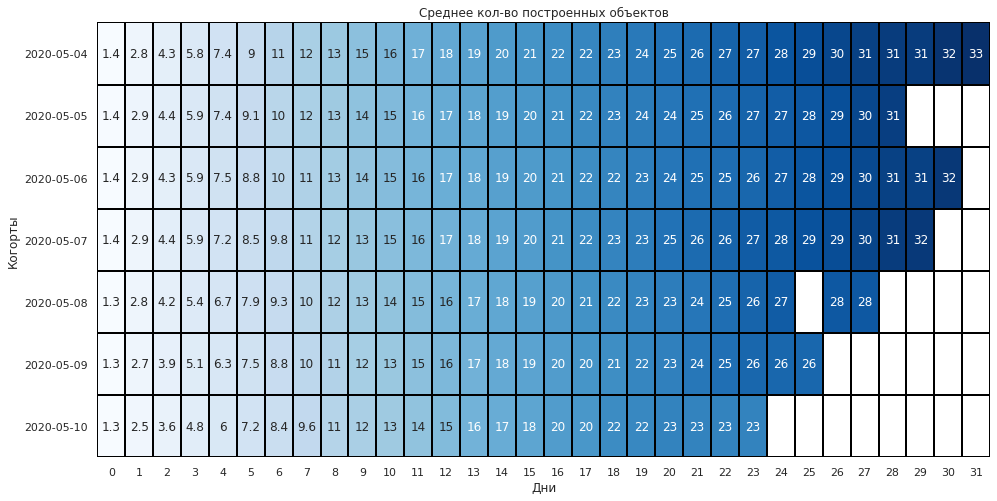

LTV:


first_date        ltv
0  2020-05-04  32.770248
1  2020-05-05  31.034637
2  2020-05-06  31.748585
3  2020-05-07  31.592986
4  2020-05-08  27.917865
5  2020-05-09  26.059297
6  2020-05-10  22.740260

In [49]:
# Посмотрил LTV по всем источникам
bldgs(cohorts_all)

- Показатели первых когорт лучше чем у последующих, но не на много

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида
Интересно, с чем это связано? Возможно у последних когорт просто было меньше времени)
 
</div>

LTV отдельно по источникам:

youtube_channel_reklama


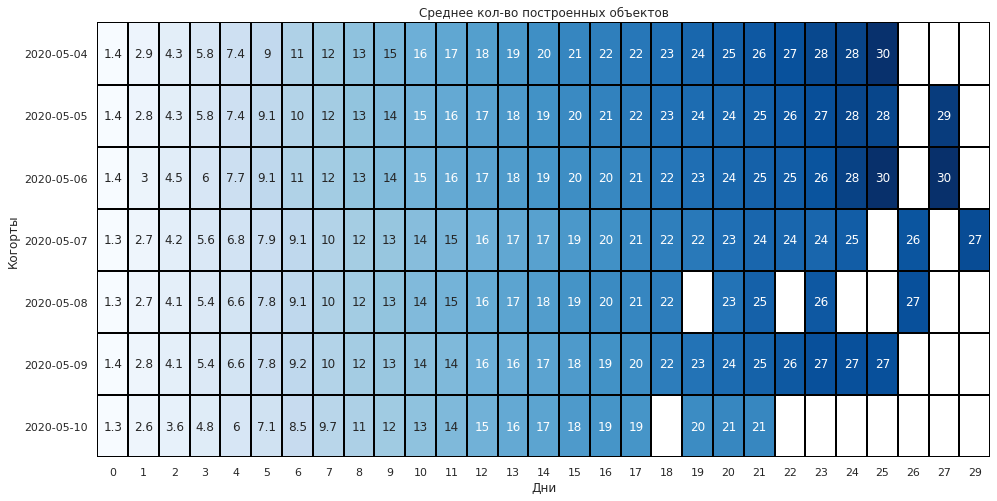

LTV:


first_date        ltv
0  2020-05-04  30.099553
1  2020-05-05  28.879936
2  2020-05-06  30.314132
3  2020-05-07  27.218585
4  2020-05-08  26.786553
5  2020-05-09  26.729443
6  2020-05-10  20.570833

facebook_ads


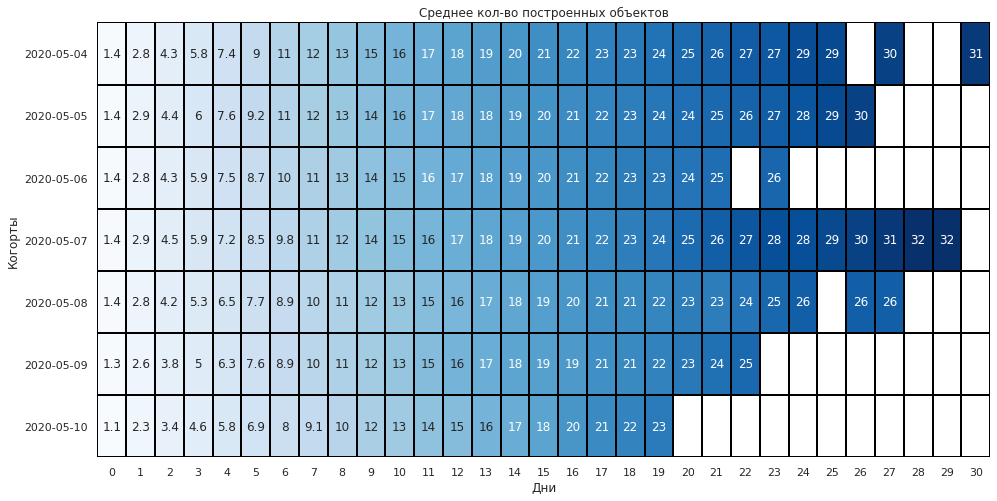

LTV:


first_date        ltv
0  2020-05-04  30.928412
1  2020-05-05  29.955783
2  2020-05-06  25.609501
3  2020-05-07  32.068915
4  2020-05-08  26.495959
5  2020-05-09  25.376898
6  2020-05-10  23.203451

instagram_new_adverts


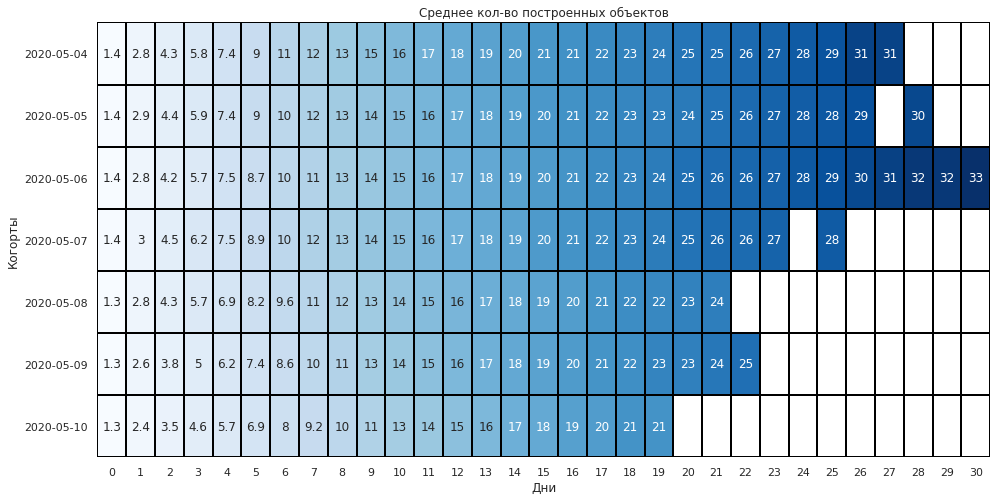

LTV:


first_date        ltv
0  2020-05-04  30.876409
1  2020-05-05  30.311762
2  2020-05-06  33.233708
3  2020-05-07  27.949309
4  2020-05-08  23.702423
5  2020-05-09  25.412910
6  2020-05-10  21.028087

yandex_direct


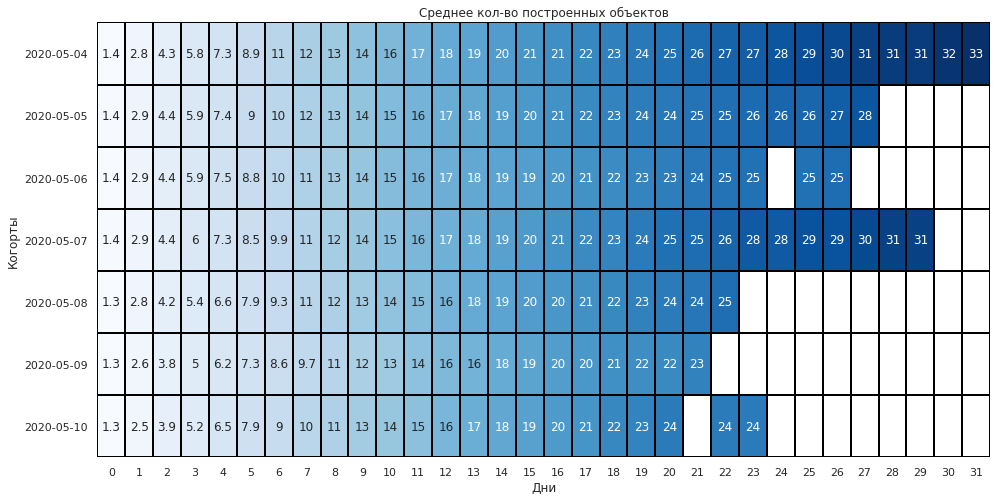

LTV:


first_date        ltv
0  2020-05-04  32.901876
1  2020-05-05  28.291301
2  2020-05-06  25.480099
3  2020-05-07  30.793499
4  2020-05-08  25.285179
5  2020-05-09  23.005341
6  2020-05-10  23.832959

In [50]:
for src in game_actions['source'].unique():
    print(src)
    cohorts_source = cohorts_src([src])
    bldgs(cohorts_source)      

- Показатели в отдельности по каждому источнику похожи на общие показатели

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида
И здесь все похоже
 
</div>

**САС**

In [51]:
# Посчитал сколько игроков пришло из одного источника и в один день
users_src_date = game_actions.groupby(['source', 'first_date']).agg(users = ('user_id', 'nunique')).reset_index()
to_datetime(users_src_date, 'first_date', '%Y-%m-%d')
ad_costs = ad_costs.merge(users_src_date, left_on = ['source', 'date'], right_on = ['source', 'first_date'], how='outer').sort_values(by=['source','date'])
ad_costs

source       date        cost first_date   users
0              facebook_ads 2020-05-03  935.882786        NaT     NaN
1              facebook_ads 2020-05-04  548.354480 2020-05-04  1184.0
2              facebook_ads 2020-05-05  260.185754 2020-05-05   694.0
3              facebook_ads 2020-05-06  177.982200 2020-05-06   345.0
4              facebook_ads 2020-05-07  111.766796 2020-05-07   224.0
5              facebook_ads 2020-05-08   68.009276 2020-05-08   139.0
6              facebook_ads 2020-05-09   38.723350 2020-05-09    84.0
28             facebook_ads        NaT         NaN 2020-05-10    56.0
7     instagram_new_adverts 2020-05-03  943.204717        NaT     NaN
8     instagram_new_adverts 2020-05-04  502.925451 2020-05-04  1452.0
9     instagram_new_adverts 2020-05-05  313.970984 2020-05-05   796.0
10    instagram_new_adverts 2020-05-06  173.071145 2020-05-06   472.0
11    instagram_new_adverts 2020-05-07  109.915254 2020-05-07   270.0
12    instagram_new_adverts 2020-05-08   71.578739 2020-05-08   175.0
13    instagram_new_adverts 2020-05-09   46.775400 2020-05-09   112.0
29    instagram_new_adverts        NaT         NaN 2020-05-10    70.0
14            yandex_direct 2020-05-03  969.139394        NaT     NaN
15            yandex_direct 2020-05-04  554.651494 2020-05-04  2078.0
16            yandex_direct 2020-05-05  308.232990 2020-05-05  1208.0
17            yandex_direct 2020-05-06  180.917099 2020-05-06   664.0
18            yandex_direct 2020-05-07  114.429338 2020-05-07   395.0
19            yandex_direct 2020-05-08   62.961630 2020-05-08   239.0
20            yandex_direct 2020-05-09   42.779505 2020-05-09   144.0
30            yandex_direct        NaT         NaN 2020-05-10    89.0
21  youtube_channel_reklama 2020-05-03  454.224943        NaT     NaN
22  youtube_channel_reklama 2020-05-04  259.073224 2020-05-04  1146.0
23  youtube_channel_reklama 2020-05-05  147.041741 2020-05-05   663.0
24  youtube_channel_reklama 2020-05-06   88.506074 2020-05-06   366.0
25  youtube_channel_reklama 2020-05-07   55.740645 2020-05-07   220.0
26  youtube_channel_reklama 2020-05-08   40.217907 2020-05-08   135.0
27  youtube_channel_reklama 2020-05-09   23.314669 2020-05-09   100.0
31  youtube_channel_reklama        NaT         NaN 2020-05-10    56.0

- Реклама началась 2020-05-03, но первые игроки появились только на следующий день. Также есть информация о новых игроках в день, когда уже рекламы не было
- Для расчета САС сдвинем вверх показатели на 1 в колонках first_date и users

In [52]:
ad_costs['users'] = ad_costs['users'].shift(-1)
ad_costs['first_date'] = ad_costs['first_date'].shift(-1)
ad_costs = ad_costs.dropna(axis='index', how='any', subset=['cost'])
ad_costs

source       date        cost first_date   users
0              facebook_ads 2020-05-03  935.882786 2020-05-04  1184.0
1              facebook_ads 2020-05-04  548.354480 2020-05-05   694.0
2              facebook_ads 2020-05-05  260.185754 2020-05-06   345.0
3              facebook_ads 2020-05-06  177.982200 2020-05-07   224.0
4              facebook_ads 2020-05-07  111.766796 2020-05-08   139.0
5              facebook_ads 2020-05-08   68.009276 2020-05-09    84.0
6              facebook_ads 2020-05-09   38.723350 2020-05-10    56.0
7     instagram_new_adverts 2020-05-03  943.204717 2020-05-04  1452.0
8     instagram_new_adverts 2020-05-04  502.925451 2020-05-05   796.0
9     instagram_new_adverts 2020-05-05  313.970984 2020-05-06   472.0
10    instagram_new_adverts 2020-05-06  173.071145 2020-05-07   270.0
11    instagram_new_adverts 2020-05-07  109.915254 2020-05-08   175.0
12    instagram_new_adverts 2020-05-08   71.578739 2020-05-09   112.0
13    instagram_new_adverts 2020-05-09   46.775400 2020-05-10    70.0
14            yandex_direct 2020-05-03  969.139394 2020-05-04  2078.0
15            yandex_direct 2020-05-04  554.651494 2020-05-05  1208.0
16            yandex_direct 2020-05-05  308.232990 2020-05-06   664.0
17            yandex_direct 2020-05-06  180.917099 2020-05-07   395.0
18            yandex_direct 2020-05-07  114.429338 2020-05-08   239.0
19            yandex_direct 2020-05-08   62.961630 2020-05-09   144.0
20            yandex_direct 2020-05-09   42.779505 2020-05-10    89.0
21  youtube_channel_reklama 2020-05-03  454.224943 2020-05-04  1146.0
22  youtube_channel_reklama 2020-05-04  259.073224 2020-05-05   663.0
23  youtube_channel_reklama 2020-05-05  147.041741 2020-05-06   366.0
24  youtube_channel_reklama 2020-05-06   88.506074 2020-05-07   220.0
25  youtube_channel_reklama 2020-05-07   55.740645 2020-05-08   135.0
26  youtube_channel_reklama 2020-05-08   40.217907 2020-05-09   100.0
27  youtube_channel_reklama 2020-05-09   23.314669 2020-05-10    56.0

In [53]:
# Посчитал стоимость привлечения игрока
ad_costs['cac'] = ad_costs['cost'] / ad_costs['users']

# Добавил кол-во построенных объектов:
buildings_amount = game_actions.groupby(['source', 'first_date']).agg(buildings = ('building_type', 'count')).reset_index()
to_datetime(buildings_amount, 'first_date', '%Y-%m-%d')
ad_costs = ad_costs.merge(buildings_amount, left_on = ['source', 'first_date'], right_on = ['source', 'first_date'], how = 'left')
ad_costs = ad_costs.drop(columns = ['first_date'])
ad_costs = ad_costs[['source' , 'date', 'users', 'buildings', 'cost', 'cac']]
ad_costs

source       date   users  buildings        cost  \
0              facebook_ads 2020-05-03  1184.0      12494  935.882786   
1              facebook_ads 2020-05-04   694.0       6895  548.354480   
2              facebook_ads 2020-05-05   345.0       3087  260.185754   
3              facebook_ads 2020-05-06   224.0       1789  177.982200   
4              facebook_ads 2020-05-07   139.0        949  111.766796   
5              facebook_ads 2020-05-08    84.0        599   68.009276   
6              facebook_ads 2020-05-09    56.0        318   38.723350   
7     instagram_new_adverts 2020-05-03  1452.0      15135  943.204717   
8     instagram_new_adverts 2020-05-04   796.0       7786  502.925451   
9     instagram_new_adverts 2020-05-05   472.0       4221  313.970984   
10    instagram_new_adverts 2020-05-06   270.0       2258  173.071145   
11    instagram_new_adverts 2020-05-07   175.0       1279  109.915254   
12    instagram_new_adverts 2020-05-08   112.0        738   71.578739   
13    instagram_new_adverts 2020-05-09    70.0        398   46.775400   
14            yandex_direct 2020-05-03  2078.0      21233  969.139394   
15            yandex_direct 2020-05-04  1208.0      11664  554.651494   
16            yandex_direct 2020-05-05   664.0       5860  308.232990   
17            yandex_direct 2020-05-06   395.0       3220  180.917099   
18            yandex_direct 2020-05-07   239.0       1642  114.429338   
19            yandex_direct 2020-05-08   144.0        860   62.961630   
20            yandex_direct 2020-05-09    89.0        553   42.779505   
21  youtube_channel_reklama 2020-05-03  1146.0      11773  454.224943   
22  youtube_channel_reklama 2020-05-04   663.0       6402  259.073224   
23  youtube_channel_reklama 2020-05-05   366.0       3218  147.041741   
24  youtube_channel_reklama 2020-05-06   220.0       1637   88.506074   
25  youtube_channel_reklama 2020-05-07   135.0        969   55.740645   
26  youtube_channel_reklama 2020-05-08   100.0        659   40.217907   
27  youtube_channel_reklama 2020-05-09    56.0        320   23.314669   

         cac  
0   0.790442  
1   0.790136  
2   0.754162  
3   0.794563  
4   0.804078  
5   0.809634  
6   0.691488  
7   0.649590  
8   0.631816  
9   0.665193  
10  0.641004  
11  0.628087  
12  0.639096  
13  0.668220  
14  0.466381  
15  0.459149  
16  0.464206  
17  0.458018  
18  0.478784  
19  0.437234  
20  0.480669  
21  0.396357  
22  0.390759  
23  0.401753  
24  0.402300  
25  0.412894  
26  0.402179  
27  0.416333

Построил графики затрат и САС на пользователя по источникам

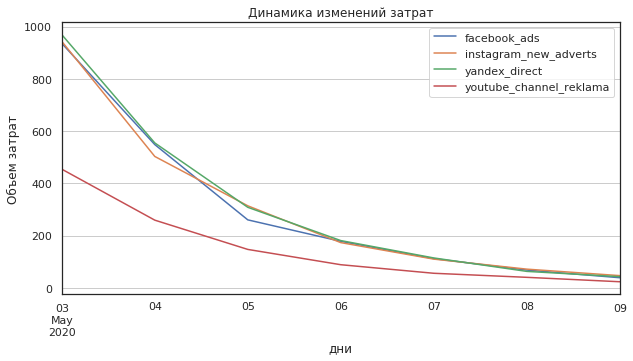

In [54]:
costs_sum_grouped_by_day = ad_costs.pivot_table(index = 'date', columns = 'source', values = 'cost')
costs_sum_grouped_by_day.plot(grid = True, figsize=(10,5))
plt.xlabel('дни')
plt.ylabel('Объем затрат')
plt.title('Динамика изменений затрат')
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида
Количество чего?
 
</div>

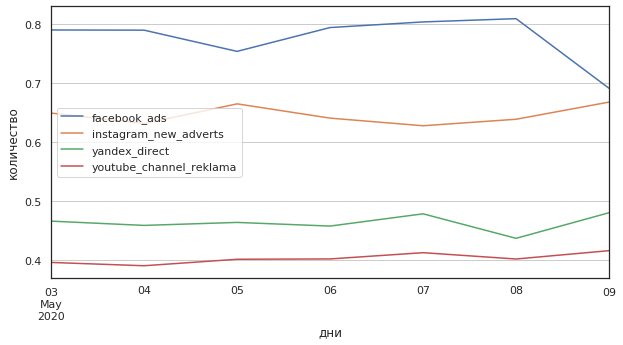

In [55]:
costs_sum_grouped_by_day = ad_costs.pivot_table(index = 'date', columns = 'source', values = 'cac')
costs_sum_grouped_by_day.plot(grid = True, figsize=(10,5))
plt.xlabel('дни')
plt.ylabel('количество')
plt.title('')
plt.legend()
plt.show()

Посчитал средний САС по каждому источнику

In [56]:
display(ad_costs.groupby('source')['cac'].mean())

source
facebook_ads               0.776358
instagram_new_adverts      0.646144
yandex_direct              0.463491
youtube_channel_reklama    0.403225
Name: cac, dtype: float64

- Retention rate снижается в каждой когорте 
- Игроки, которые пришли из-за рекламы в Facebook самые дорогие, потом идут те, кто из Instagram, Яндекс.Директ и YouTube
- LTV по разным источникам практически не различаются между собой
- Судя по изученным показателям, поведение игроков никак не зависит от источника его привлечения. Поэтому стоит тратить ресурсы на дешевые источники. К ним можно отнести Яндекс. Директ, откуда пришло наибольшее кол-во игроков, и на YouTube.

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида
"А если не видно разницы, зачем платить больше?"

Очень классное исследование источников! Выводы просто замечательные получились) Youtube и Yandex оказались самыми выгодными. Сосредоточимся, пожалуй, на них

 
</div>

### [4. Проверка гипотез](#plan) <a id="st4"></a> 

Проверил две гипотезы:

- Проверьте гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком
- Проверьте гипотезу различия количества построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком

### [4.1. Медианное время прохождения уровня в зависимости от стратегии прохождения различается](#plan) <a id="st4_1"></a> 

Выделим время прохождения уровня для каждого способа:

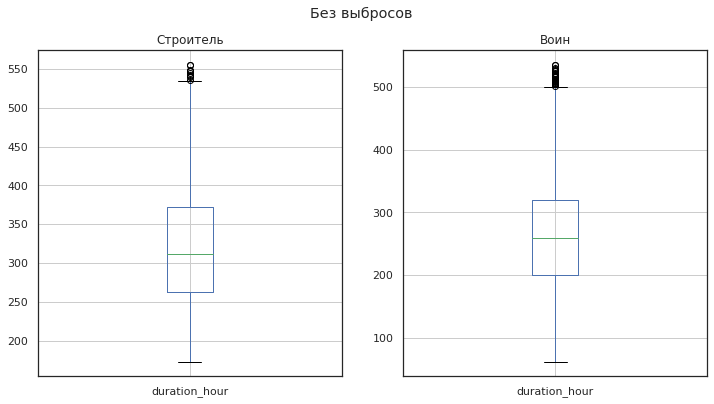

In [57]:
# Раздедил данные на строителей и воинов, а также удалил выбросы
time_project = users_info[users_info['status'] == 'project']['duration_hour'].reset_index()
time_project = time_project[time_project['duration_hour'] < time_project['duration_hour'].quantile(0.99)]
time_project = time_project[time_project['duration_hour'] > time_project['duration_hour'].quantile(0.01)]

time_warrior = users_info[users_info['status'] == 'warrior']['duration_hour'].reset_index()
time_warrior = time_warrior[time_warrior['duration_hour'] < time_warrior['duration_hour'].quantile(0.99)]
time_warrior = time_warrior[time_warrior['duration_hour'] > time_warrior['duration_hour'].quantile(0.01)]

fig, ax = plt.subplots(figsize = (12, 6))
time_project.boxplot('duration_hour', ax = plt.subplot(1, 2, 1))
plt.title('Строитель')
time_warrior.boxplot('duration_hour', ax = plt.subplot(1, 2, 2))
plt.title('Воин')
fig.suptitle('Без выбросов')
plt.show()

Судя по картинкам, распределения нормальные. Для проверки гипотезы использовал t-критерий Стьюдента

- Нулевая гипотеза H₀: медианное значение времени прохождения уровня рассматриваемых генеральных совокупностей равны между собой.
- Альтернативная гипотеза H₁: медианное значение времени прохождения уровня рассматриваемых генеральных совокупностей не равны между собой.

In [58]:
# Зададим пороговый уровень статистической значимости:
alpha = 0.05

In [59]:
pvalue = stats.ttest_ind(time_warrior['duration_hour'].values, time_project['duration_hour'].values).pvalue
print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: медианное время для завершения уровня в группах А и В одинаковая.')
else:
    print('Нулевая гипотеза отвергается: медианное время для завершения уровня в группах А и В отличается.')
    print('Воин:', time_warrior['duration_hour'].median(),'Строитель:' , time_project['duration_hour'].median())

p-value: 6.433246614712471e-112
Нулевая гипотеза отвергается: медианное время для завершения уровня в группах А и В отличается.
Воин: 259.0 Строитель: 312.0


- Строители дольше проходят уровень чем воины, и это различие статистически значимо

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Кажется, наши игроки не хотят тратить время даром)
 
</div>

### [4.2. Среднее количество построенных объектов в зависимости от стратегии прохождения различается](#plan) <a id="st4_3"></a> 

- Нулевая гипотеза H₀: среднее количество построенных зданий рассматриваемых генеральных совокупностей равны между собой
- Альтернативная гипотеза H₁: среднее количество построенных зданий рассматриваемых генеральных совокупностей не равны между собой

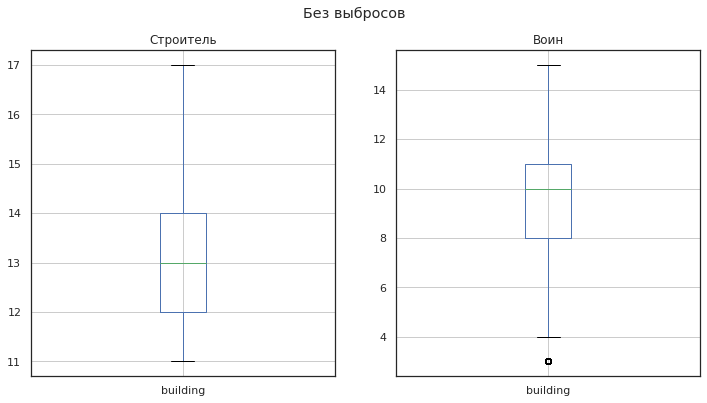

In [60]:
# Раздедил данные на строителей и воинов, а также удалил выбросы
project_buildings = users_info[users_info['status'] == 'project']['building'].reset_index()
project_buildings = project_buildings[project_buildings['building'] < project_buildings['building'].quantile(0.99)]
project_buildings = project_buildings[project_buildings['building'] > project_buildings['building'].quantile(0.01)]

warrior_buildings = users_info[users_info['status'] == 'warrior']['building'].reset_index()
warrior_buildings = warrior_buildings[warrior_buildings['building'] < warrior_buildings['building'].quantile(0.99)]
warrior_buildings = warrior_buildings[warrior_buildings['building'] > warrior_buildings['building'].quantile(0.01)]

fig, ax = plt.subplots(figsize = (12, 6))
project_buildings.boxplot('building', ax = plt.subplot(1, 2, 1))
plt.title('Строитель')
warrior_buildings.boxplot('building', ax = plt.subplot(1, 2, 2))
plt.title('Воин')
fig.suptitle('Без выбросов')
plt.show()

Судя по картинкам, распределения нормальные. Для проверки гипотезы использовал t-критерий Стьюдента.

In [61]:
pvalue = stats.ttest_ind(warrior_buildings['building'].values, project_buildings['building'].values).pvalue
print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: медианное время для завершения уровня в группах А и В одинаковая.')
else:
    print('Нулевая гипотеза отвергается: медианное время для завершения уровня в группах А и В отличается.')
    print('Воин:', warrior_buildings['building'].median(),'Строитель:' , project_buildings['building'].median())

p-value: 0.0
Нулевая гипотеза отвергается: медианное время для завершения уровня в группах А и В отличается.
Воин: 10.0 Строитель: 13.0


- Строители в среднем строят на 3 здания больше чем воины, и это различие статистически значимо

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Теперь понятно, почему у нас есть фаворит среди стратегий
 
</div>

### [5. Выводы](#plan) <a id="st5"></a> 

1. Поведение игроков не зависит от источников, откуда они пришли.
2. В день в среднем 2885 игроков и 4110 событий.
3. Основной отток происходит после недели игры. Через 2 недели остаются только 10%.
4. Больше половины игроков не проходили первый уровень. 30% проходят уровень через победу над врагом и14% с помощью строительства проекта.
5. Строители тратят на прохождение первого уровня в среднем 13 дней и строят 12-13 зданий. Воины тратят 10-11 дней и строят 9-10 зданий.
6. Больше всего пользователей пришло из Яндекс.Директ.
7. Показатели LTV, Retention rate и Sticky factor отличаются незачительно.
8. Дороже всего привлечь клиентов из Facebook, потом из Instagram, Яндекс.Директ и YouTube.
9. Проверив гипотезы о различии медианного времени прохождения первого уровня строителями и воинами и о среднем кол-ве построенных зданий, можно прийти к выводам, что строители и воины имеют статистически значимые различия по времени прохождения уровня и по кол-ву построенных зданий.


Также можно порекомендовать увеличить необходимое кол-во построенных зданий для воинов. Так будет увеличено кол-во просмотренных реклам игроками.
Так как характеристики игроков особо не отличаются в зависимости от их источника, лучше сконцентрироваться на рекламе в тех источниках, где цена привлечения новых игроков ниже остальных. Это Яндекс.Директ и YouTube. 
Рекламу игрокам лучше начать показывать с первого же дня. Так как большая часть игроков уходит после первой недели.

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида

Спасибо за работу! Она выполнена на очень высоком уровне! Получилось настоящее полноценное разносторонее исследование 💪
    
Мне очень понравились визуализации и выводы. Все просто супер! Но есть и некоторые моменты, которые стоит подкорректировать:

- презентация. по ней я оставила комментарии в начале работы
- итоговые выводы. Цель твоей работы - формирование модели монетизации. Главная задача - определить момент, в который нужно начинать показывать рекламу (день, два.. десять?) и определить, сможем ли мы окупить маркетинговые траты. Либо если ты неправильно указал тему, поправь, пожалуйста.
</div>